In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

### Load datasets

In [2]:
GDP = pd.read_csv('Final-GDP-dataset.csv')
suicide = pd.read_csv('../datasets/Suicide-rate.csv')
spending =  pd.read_csv('Final-SAPCE-dataset.csv')

C:\Users\ltpie\AppData\Local\Temp\ipykernel_9764\317773761.py:1: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  GDP = pd.read_csv('Final-GDP-dataset.csv')


In [3]:
spending

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,"""00000""",United States,0,SAPCE1,1.0,...,Personal consumption expenditures,Millions of current dollars,5536790.1,...,11047363.2,11363527.8,11847725.1,12263476.3,12693265.6,13233608.6,13904979.5,14392721.0,14116165.7,15902575.3
1,1,"""00000""",United States,0,SAPCE1,2.0,...,Goods,Millions of current dollars,2006505.5,...,3637739.2,3729972.7,3862956.5,3922992.5,3991848.9,4159375.0,4355177.3,4473509.9,4670135.0,5496516.0
2,2,"""00000""",United States,0,SAPCE1,3.0,...,Durable goods,Millions of current dollars,715529.6,...,1144221.0,1189413.3,1242075.5,1307605.2,1345193.9,1398248.0,1470686.8,1510542.9,1646793.0,2060246.3
3,3,"""00000""",United States,0,SAPCE1,4.0,...,Motor vehicles and parts,Millions of current dollars,293082.5,...,396607.9,417533.0,441992.0,475346.0,484318.5,502150.2,520875.0,517001.3,533928.4,688718.9
4,4,"""00000""",United States,0,SAPCE1,5.0,...,Furnishings and durable household equipment,Millions of current dollars,160490.2,...,253938.0,263589.7,276166.5,294219.7,308489.1,322796.3,346025.8,360456.0,411923.1,495001.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,17589,"""98000""",Far West,8,SAPCE4,129.0,...,Foreign travel by U.S. residents,Millions of current dollars,12370.1,...,24644.3,24124.6,25604.3,26623.3,27550.7,29846.2,32074.1,35448.2,10079.0,19385.4
17578,17590,"""98000""",Far West,8,SAPCE4,130.0,...,Less: Expenditures in the United States by ...,Millions of current dollars,17497.0,...,30906.3,34770.9,37502.2,40692.6,40655.9,41603.3,42866.4,43413.4,16534.6,17917.0
17579,17591,"""98000""",Far West,8,SAPCE4,132.0,...,Final consumption expenditures of nonprofit i...,Millions of current dollars,15742.9,...,60941.7,64219.0,66783.9,71720.6,78717.3,82662.8,87622.0,88952.0,99973.4,90573.0
17580,17592,"""98000""",Far West,8,SAPCE4,133.0,...,Gross output of nonprofit institutions,Millions of current dollars,79226.1,...,227811.9,235697.0,245181.6,262357.3,278990.5,290990.0,307651.0,323270.9,325082.0,342306.8


### pre-process spending & GDP datasets

In [4]:
# Drop rows with irrelevant totals 
spending = spending.drop(spending[(spending.GeoName == 'New England') |\
                                  (spending.GeoName == 'District of Columbia') |\
                                  (spending.GeoName == 'Great Lakes') |\
                                  (spending.GeoName == 'Plains') |\
                                  (spending.GeoName == 'Southeast') |\
                                  (spending.GeoName == 'Southwest') |\
                                  (spending.GeoName == 'Far West') |\
                                  (spending.GeoName == 'Rocky Mountain') |\
                                  (spending.GeoName == 'Mideast')
                                 ].index)

GDP = GDP.drop(GDP[(GDP.GeoName == 'New England') |\
                                  (GDP.GeoName == 'District of Columbia') |\
                                  (GDP.GeoName == 'Great Lakes') |\
                                  (GDP.GeoName == 'Plains') |\
                                  (GDP.GeoName == 'Southeast') |\
                                  (GDP.GeoName == 'Southwest') |\
                                  (GDP.GeoName == 'Far West') |\
                                  (GDP.GeoName == 'Rocky Mountain') |\
                                  (GDP.GeoName == 'Mideast')
                                 ].index)

# Drop rows with irrelevant units 
spending = spending.drop(spending[spending.Unit != 'Millions of current dollars'].index)
GDP = GDP.drop(GDP[GDP.Unit != 'Thousands of dollars'].index)

# Drop irrelevant columns 
spending = spending.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)
GDP = GDP.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)

In [5]:
spending = spending.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})


GDP = GDP.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})

### Analysis GDP & spending

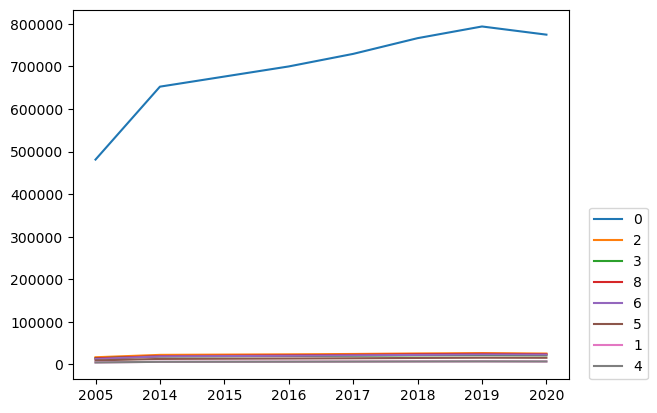

In [6]:
# spending & GDP per region per year
cols = ['2005', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
sp_avr = spending.groupby('Region').mean()[cols]
GDP_avr = GDP.groupby('Region').mean()[cols]


'''
which region spent the most?

NOTE: spending decline for all regions after 2019
'''
sp_avr.nlargest(n=8,columns=cols).T.plot()
plt.legend(loc=(1.04, 0));

In [7]:
'''
What is the main spending category per region?
  -->get top 20 spending categories per region

'''
sp_cat = spending.groupby(['Region','Description']).mean()[cols]
top20_per_region = pd.DataFrame()

for i in range(1,9):   
    '''
    NOTE: n=23 instead of 20 beacuse
    the top 3 spendings are totals 
    of different industries.  
        ---> exclude top 3
    '''
    top20 = sp_cat.loc[i].nlargest(n=23,columns=cols)
    top20 = top20.index[3:].to_list()
    top20_per_region[f'region {i}'] = top20

top20_per_region

,region 1,region 2,region 3,region 4,region 5,region 6,region 7,region 8
0,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...,Household consumption expenditures (for serv...
1,Goods,Goods,Goods,Goods,Goods,Goods,Goods,Goods
2,Nondurable goods,Nondurable goods,Nondurable goods,Nondurable goods,Nondurable goods,Nondurable goods,Nondurable goods,Nondurable goods
3,Health,Health,Health,Health,Health,"Housing, utilities, and fuels","Housing, utilities, and fuels","Housing, utilities, and fuels"
4,"Housing, utilities, and fuels","Housing, utilities, and fuels","Housing, utilities, and fuels","Housing, utilities, and fuels","Housing, utilities, and fuels",Housing and utilities,Housing and utilities,Housing and utilities
5,Housing and utilities,Housing and utilities,Housing and utilities,Housing and utilities,Housing and utilities,Health,Health,Health
6,Health care,Health care,Health care,Health care,Housing,Housing,Housing,Housing
7,Housing,Housing,Housing,Housing,Housing,Housing,Housing,Housing
8,Housing,Housing,Housing,Housing,Health care,Health care,Durable goods,Health care
9,Durable goods,Gross output of nonprofit institutions,Durable goods,Durable goods,Durable goods,Durable goods,Health care,Durable goods


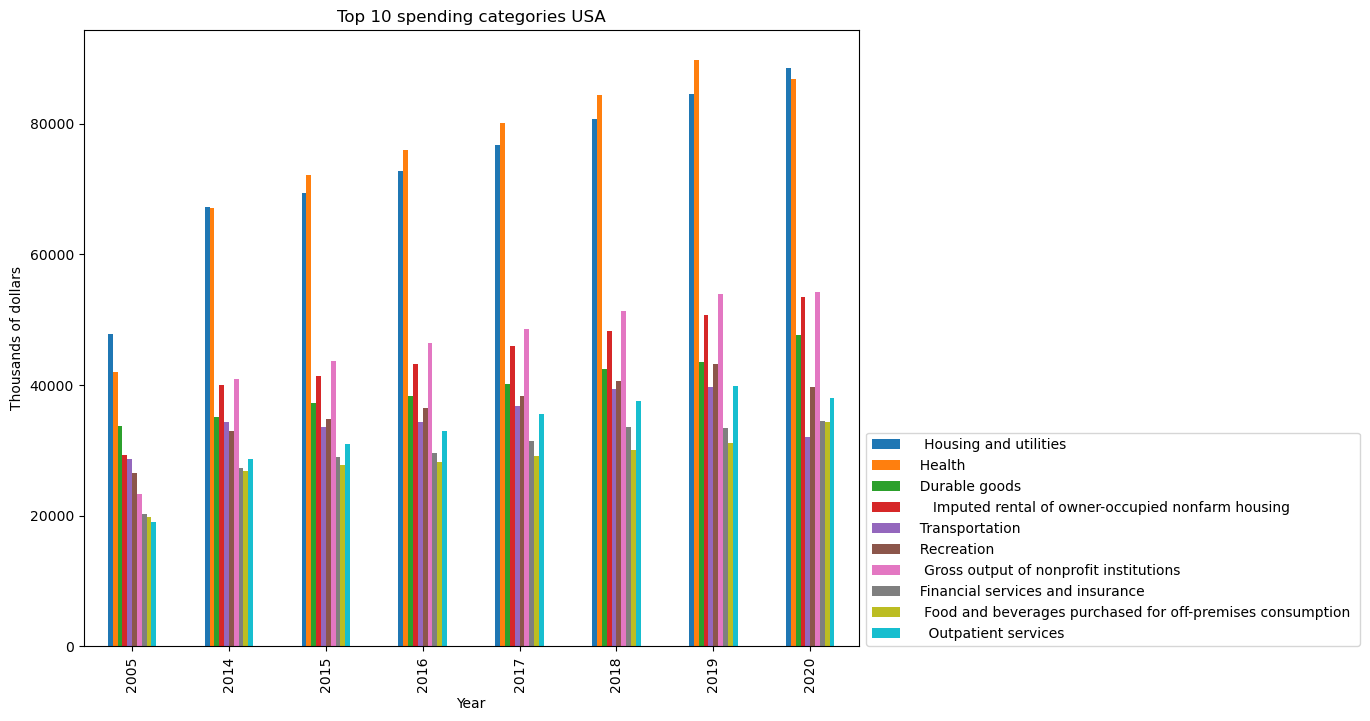

In [8]:
'''
plot top 10 spending categories per year 
for a specific region
  --> Region=8
'''
top10 = sp_cat.loc[8].nlargest(n=30,columns=cols)
top10.loc[top10.index[[7,8,12,13,15,16,17,20,22,24]]].T.plot.bar(figsize=(10,8))
plt.title('Top 10 spending categories USA')
plt.xlabel('Year')
plt.ylabel('Thousands of dollars')
plt.legend(loc=(1.01, 0));


### pre-process suicide dataset

In [9]:
import matplotlib.pyplot as plt

# extract region numbers column from spending data set & add it to suicide dataset
regions = spending[['GeoName','Region']]
df2 = pd.merge(suicide, regions, left_on='STATE', right_on='GeoName')
# THERE WAS AN ERROR HERE ON THE ORIGINAL FILE
df2.drop('GeoName', axis=1,inplace=True)
df2 = df2.drop_duplicates()

df2["YEAR"] = df2["YEAR"].apply(lambda x: str(x))

sui_avr = df2.groupby(['YEAR', 'Region']).mean()
sui_avr = sui_avr.rename(columns={'RATE': 'suicide rate'})

### pre-process unemployment dataset

In [10]:
employment_df = pd.read_csv('Final-Employment-Data.csv')

employment_df.dtypes

Year                                int64
Region                              int64
labor force participation rate    float64
employment-population ratio       float64
labor force                       float64
employment                        float64
unemployment                      float64
unemployment rate                 float64
dtype: object

In [11]:
#We only want the value of unemployment rate, so we'll take the year, region and unemployment rate column
processed_unemp = employment_df[['Region','Year', 'unemployment rate']]

#change year to string type for merging
processed_unemp.loc[:,'Year'] = processed_unemp.loc[:,'Year'].apply(lambda x: str(x))
processed_unemp.dtypes

C:\Users\ltpie\AppData\Local\Temp\ipykernel_9764\300467328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_unemp.loc[:,'Year'] = processed_unemp.loc[:,'Year'].apply(lambda x: str(x))


Region                 int64
Year                  object
unemployment rate    float64
dtype: object

### merging datasets

In [12]:
income_df = pd.read_csv('../Gilbert/Income-Final.csv')

In [13]:
income_df

,Region,2005,2014,2015,2016,2017,2018,2019,2020
0,1,8.289722e+28,1.091640e+29,1.122024e+29,1.144674e+29,1.166858e+29,1.215441e+29,1.258892e+29,1.307726e+29
1,2,6.561755e+28,7.669286e+28,7.978126e+28,8.122464e+28,8.402967e+28,8.786138e+28,9.036308e+28,9.387483e+28
2,3,7.595063e+23,9.847682e+23,1.028869e+24,1.040729e+24,1.072229e+24,1.130729e+24,1.168770e+24,1.242790e+24
3,4,4.660189e+33,6.385639e+33,6.586353e+33,6.613068e+33,6.749498e+33,7.023358e+33,7.195361e+33,7.616080e+33
4,5,2.495774e+58,3.087949e+58,3.210950e+58,3.251201e+58,3.351952e+58,3.461619e+58,3.607370e+58,3.848289e+58
5,6,8.081822e+18,9.689093e+18,1.008360e+19,1.036835e+19,1.087435e+19,1.136660e+19,1.203111e+19,1.308187e+19
6,7,7.559459e+23,1.015948e+24,1.046788e+24,1.047808e+24,1.105028e+24,1.169069e+24,1.242489e+24,1.307170e+24
7,8,6.512565e+28,9.311252e+28,9.595924e+28,9.379761e+28,9.531598e+28,9.936436e+28,1.021944e+29,1.045945e+29


<b> Creating a common structure to all the data frames for merging</b>

In [14]:
#createing hierarchical indexing of year + region for each data frame
sp_df = sp_avr.iloc[1:].unstack().to_frame()
gdp_df = GDP_avr.iloc[1:].unstack().to_frame()
income_df = income_df.groupby('Region').mean().unstack().to_frame()
unemployment_df = processed_unemp.groupby(['Year', 'Region']).mean()

<b> Now they have a common structure with the same hierarchical indexing </b>

In [15]:
sp_df

0
     Region              
2005 1        4742.038042
     2       16830.263197
     3       14507.321115
     4        4561.673712
     5        9468.096995
...                   ...
2020 4        6967.225597
     5       15557.334758
     6       23018.087268
     7        5854.727361
     8       24089.987113

[64 rows x 1 columns]

In [16]:
gdp_df

0
     Region              
2005 1       8.182572e+05
     2       3.114584e+06
     3       2.685477e+06
     4       8.036759e+05
     5       1.649919e+06
...                   ...
2020 4       1.246523e+06
     5       2.492921e+06
     6       4.134161e+06
     7       9.857673e+05
     8       4.666662e+06

[64 rows x 1 columns]

In [17]:
income_df

0
     Region              
2005 1       8.289722e+28
     2       6.561755e+28
     3       7.595063e+23
     4       4.660189e+33
     5       2.495774e+58
...                   ...
2020 4       7.616080e+33
     5       3.848289e+58
     6       1.308187e+19
     7       1.307170e+24
     8       1.045945e+29

[64 rows x 1 columns]

In [18]:
unemployment_df

unemployment rate
Year Region                   
2005 1                4.445833
     2                5.075000
     3                5.715000
     4                4.210714
     5                5.539583
...                        ...
2020 4                5.282143
     5                7.129861
     6                7.355556
     7                5.738333
     8               10.566667

[64 rows x 1 columns]

<b> Renaming the indexes so that they match for merging, and columns for value representation </b>

In [19]:
sp_df = sp_df.rename(columns={0: 'spending'})
gdp_df = gdp_df.rename(columns={0: 'GDP'})
income_df = income_df.rename(columns={0: 'income'})


# merged_df = pd.merge(ex, ex1, left_index=True, right_index=True, how='inner')
concatenated_df = pd.concat([sp_df, gdp_df, sui_avr, income_df, unemployment_df], axis=1)
concatenated_df.index = concatenated_df.index.rename("Year", level=0)
org_concatenated = concatenated_df

In [20]:
# concatenated_df['suicide rate'].groupby(level=[1,0]).mean()
ex = concatenated_df.groupby(level=[1]).mean().nlargest(n=10,columns='suicide rate')['suicide rate']
ex.to_frame()

,suicide rate
Region,
7,22.662500
6,18.256250
8,16.962500
4,16.192857
5,15.052083
3,13.355000
1,13.166667
2,10.087500


# H2 Analysis of percentage change

In [21]:
# We have converted all the columns into percentage, so at the end we can visualize and understand correlation better
concatenated_df = concatenated_df.reset_index(level="Year",col_level=0)



<b>Changing the years to datetime and correcting end of fiscal year</b>


In [22]:
"""census is taken at the end of the anual year, therefore we have to change the years to represent the 
end of the fiscal year instead of the start
"""
new_year_format = lambda x : "31-12-" + x;
#convert each year to datetime format
convert_to_datetime = lambda x: pd.to_datetime(x, infer_datetime_format=True)
#appllying to the year column
concatenated_df['Year'] = concatenated_df['Year'].apply(new_year_format).apply(convert_to_datetime)
concatenated_df

,Year,spending,GDP,suicide rate,income,unemployment rate
Region,,,,,,
1,2005-12-31,4742.038042,8.182572e+05,9.750000,8.289722e+28,4.445833
2,2005-12-31,16830.263197,3.114584e+06,8.260000,6.561755e+28,5.075000
3,2005-12-31,14507.321115,2.685477e+06,10.900000,7.595063e+23,5.715000
4,2005-12-31,4561.673712,8.036759e+05,12.500000,4.660189e+33,4.210714
5,2005-12-31,9468.096995,1.649919e+06,12.308333,2.495774e+58,5.539583
...,...,...,...,...,...,...
4,2020-12-31,6967.225597,1.246523e+06,17.400000,7.616080e+33,5.282143
5,2020-12-31,15557.334758,2.492921e+06,15.566667,3.848289e+58,7.129861
6,2020-12-31,23018.087268,4.134161e+06,19.250000,1.308187e+19,7.355556


In [23]:
df_by_year_change = concatenated_df.groupby('Year').mean()

In [24]:
df_by_year_change = df_by_year_change.pct_change().fillna(0)
df_by_year_change

,spending,GDP,suicide rate,income,unemployment rate
Year,,,,,
2005-12-31,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-31,0.359185,0.365771,0.209338,0.237271,0.176685
2015-12-31,0.036123,0.033207,0.042648,0.039833,-0.127411
2016-12-31,0.034895,0.024472,0.007462,0.012535,-0.061919
2017-12-31,0.042198,0.043756,0.053924,0.030989,-0.104766
2018-12-31,0.050385,0.059190,-0.011864,0.032718,-0.095542
2019-12-31,0.035648,0.039365,-0.002260,0.042105,-0.049793
2020-12-31,-0.025031,-0.047463,-0.020061,0.066785,1.083954


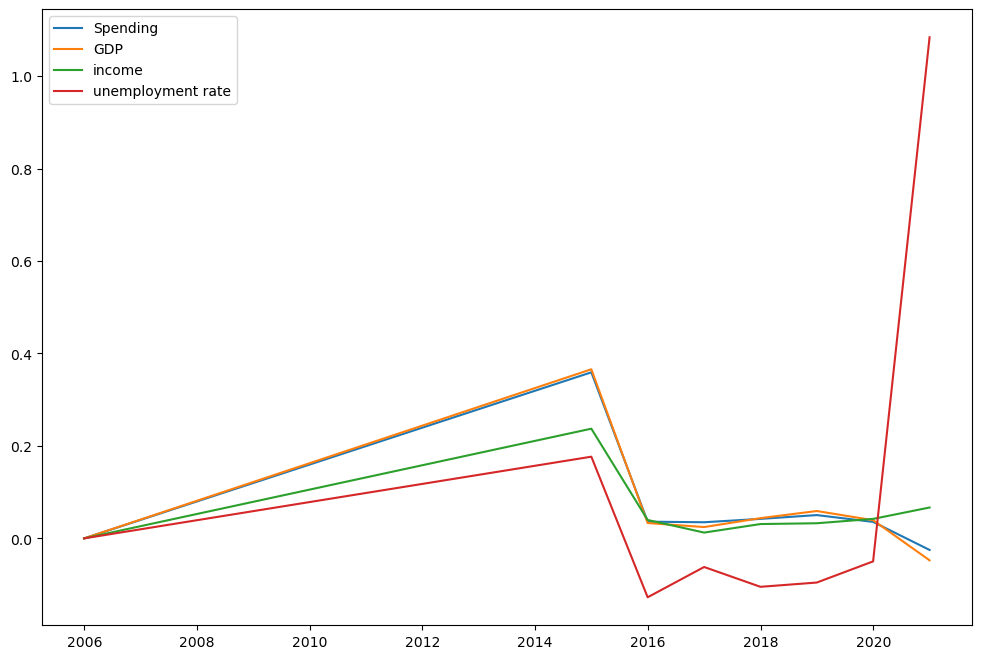

In [25]:
fig = plt.figure(figsize=(12,8));ax = fig.add_subplot(1,1,1);


ax.plot(df_by_year_change.index, df_by_year_change['spending'], label="Spending")
ax.plot(df_by_year_change.index, df_by_year_change['GDP'], label="GDP")
# ax.plot(df_by_year_change.index, df_by_year_change['suicide rate'], label="suicide rate")
ax.plot(df_by_year_change.index, df_by_year_change['income'], label="income")
ax.plot(df_by_year_change.index, df_by_year_change['unemployment rate'], label="unemployment rate")
ax.legend(loc='best');


<b>Plotting with Rolling average</b>

In [26]:
df2_by_year_change = df_by_year_change['2014':'2020']
df2_by_year_change

,spending,GDP,suicide rate,income,unemployment rate
Year,,,,,
2014-12-31,0.359185,0.365771,0.209338,0.237271,0.176685
2015-12-31,0.036123,0.033207,0.042648,0.039833,-0.127411
2016-12-31,0.034895,0.024472,0.007462,0.012535,-0.061919
2017-12-31,0.042198,0.043756,0.053924,0.030989,-0.104766
2018-12-31,0.050385,0.059190,-0.011864,0.032718,-0.095542
2019-12-31,0.035648,0.039365,-0.002260,0.042105,-0.049793
2020-12-31,-0.025031,-0.047463,-0.020061,0.066785,1.083954


In [27]:
df2_by_year_change = df2_by_year_change.rolling(window=1).mean().bfill()
df2_by_year_change

,spending,GDP,suicide rate,income,unemployment rate
Year,,,,,
2014-12-31,0.359185,0.365771,0.209338,0.237271,0.176685
2015-12-31,0.036123,0.033207,0.042648,0.039833,-0.127411
2016-12-31,0.034895,0.024472,0.007462,0.012535,-0.061919
2017-12-31,0.042198,0.043756,0.053924,0.030989,-0.104766
2018-12-31,0.050385,0.059190,-0.011864,0.032718,-0.095542
2019-12-31,0.035648,0.039365,-0.002260,0.042105,-0.049793
2020-12-31,-0.025031,-0.047463,-0.020061,0.066785,1.083954


<AxesSubplot:xlabel='Year'>

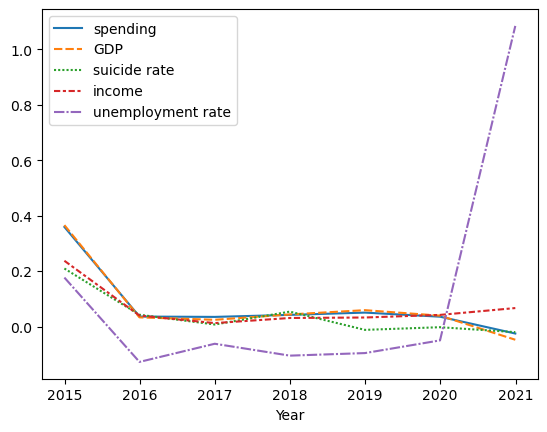

In [28]:
# df2_by_year_change.plot();
# plt.savefig('all.png', format='png')
sns.lineplot(data=df2_by_year_change)

### Suicide-rate & GDP (per region)

In [29]:
# Group the data by region
SGR = concatenated_df.groupby(level='Region')

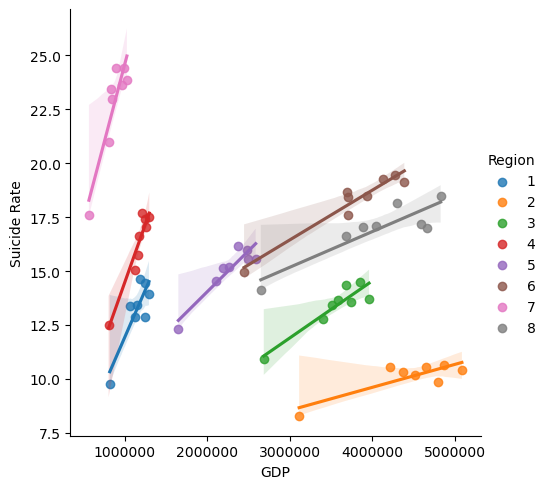

In [54]:
# Create a list to store the data for each region
data_list = []

# Iterate over the grouped data
for name, group in SGR:
    data_list.append(group[['GDP', 'suicide rate']].assign(Region=name))

# Concatenate the data for each region into a single DataFrame
grouped_data = pd.concat(data_list)

# Use the lmplot function to create the scatter plot with a regression line
sns.lmplot(x='GDP', y='suicide rate', data=grouped_data, hue='Region')

plt.xlabel('GDP')
plt.ylabel('Suicide Rate')
#plt.title('GDP VS. Suicide rate')
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig('GDP-VS-sui.png', format='png')
plt.show()

### Suicide-rate & Income (per year)

In [31]:
concatenated_df.Year

Region
1   2005-12-31
2   2005-12-31
3   2005-12-31
4   2005-12-31
5   2005-12-31
       ...    
4   2020-12-31
5   2020-12-31
6   2020-12-31
7   2020-12-31
8   2020-12-31
Name: Year, Length: 64, dtype: datetime64[ns]

In [32]:
grouped_data = concatenated_df.groupby('Year').mean()

<b>Normalizing the suicide rate and income data and calculation of interesction</b>

In [46]:

# Normalize the data using min-max normalization
grouped_data['suicide rate'] = (grouped_data['suicide rate'] - \
                                grouped_data['suicide rate'].min()) / (grouped_data['suicide rate'].max() -\
                                                                      grouped_data['suicide rate'].min())
grouped_data['income'] = (grouped_data['income'] - \
                          grouped_data['income'].min()) / (grouped_data['income'].max() -\
                                                           grouped_data['income'].min())

#Zoomed version of the same data
data_2020 = grouped_data.loc[datetime(2019,12,31):datetime(2020,12,31) ]

# # # Find the intersection point
intersection = np.argwhere(np.diff(np.sign(grouped_data['suicide rate'] - grouped_data['income']))).flatten()

intersection_x = 10
intersection_y = -30

<b>Creating Functions to help with the plotting and Annotating</b>

In [47]:
#function to help with plotting
"""args:
    1) datas that we want to plot a line for within the plot figure
    2) the labels we want to gie these datas (for legend labelling)
    3 and 4) x and y labels
    5) the plot figure we want to plot on"""
def plot_label_legend(datas, data_labels, x_label, y_label, ax):
    ax.plot(datas[0], label=data_labels[0])
    ax.plot(datas[1], label=data_labels[1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(loc='best')

<b>Setting up a 2x1 plot space for the plot figures Then Plotting</b>

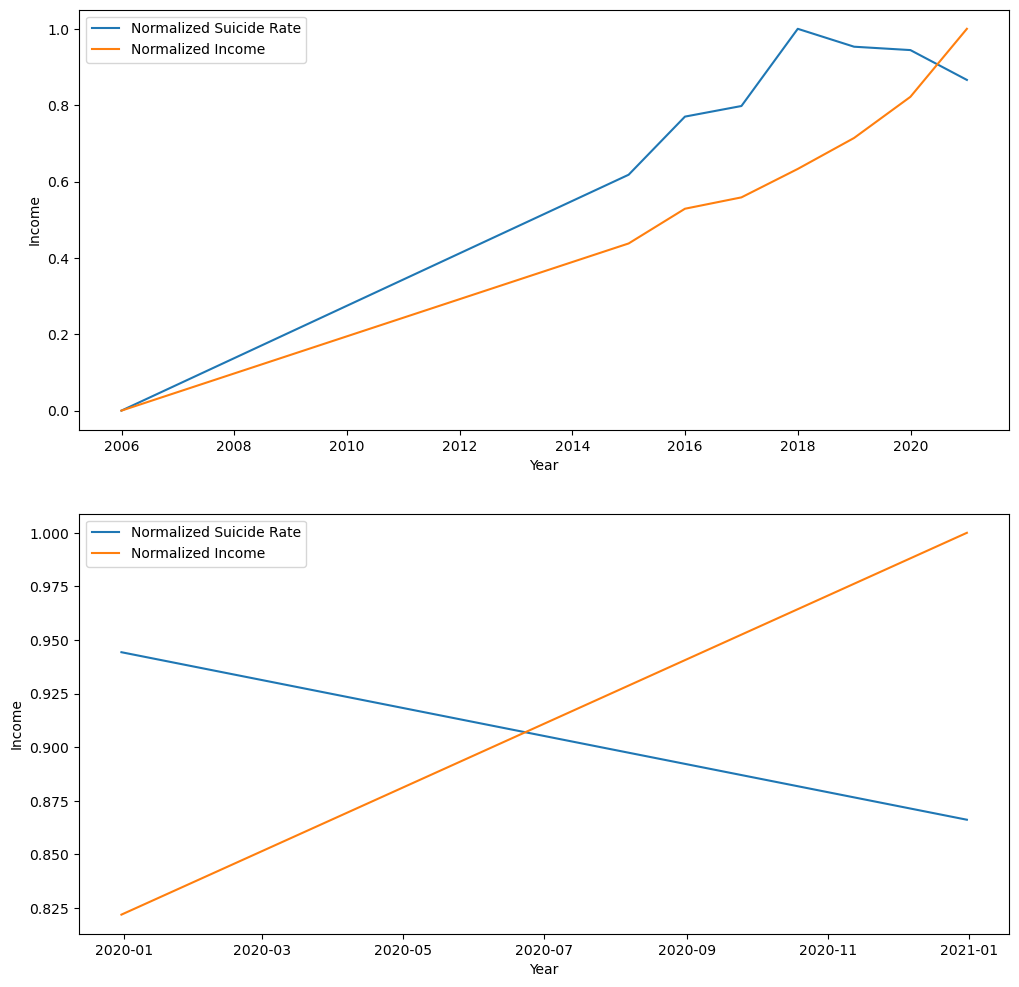

In [48]:
#set up plot space
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 1, 1) # 2x1 plot space, 1st figure
ax2 = fig.add_subplot(2, 1, 2) #2x1 plot space, second figure


# Plot the normalized suicide rate and income columns over time

#plot original data
plot_label_legend([grouped_data['suicide rate'], grouped_data['income']],
                  ['Normalized Suicide Rate', 'Normalized Income'], 'Year', 'Income', ax1)

#plot zoomed data
plot_label_legend([data_2020['suicide rate'], data_2020['income']],
                  ['Normalized Suicide Rate', 'Normalized Income'], 'Year', 'Income', ax2)


<b>Annotating the plot</b>

In [49]:
from pandas.tseries.offsets import Day, MonthEnd

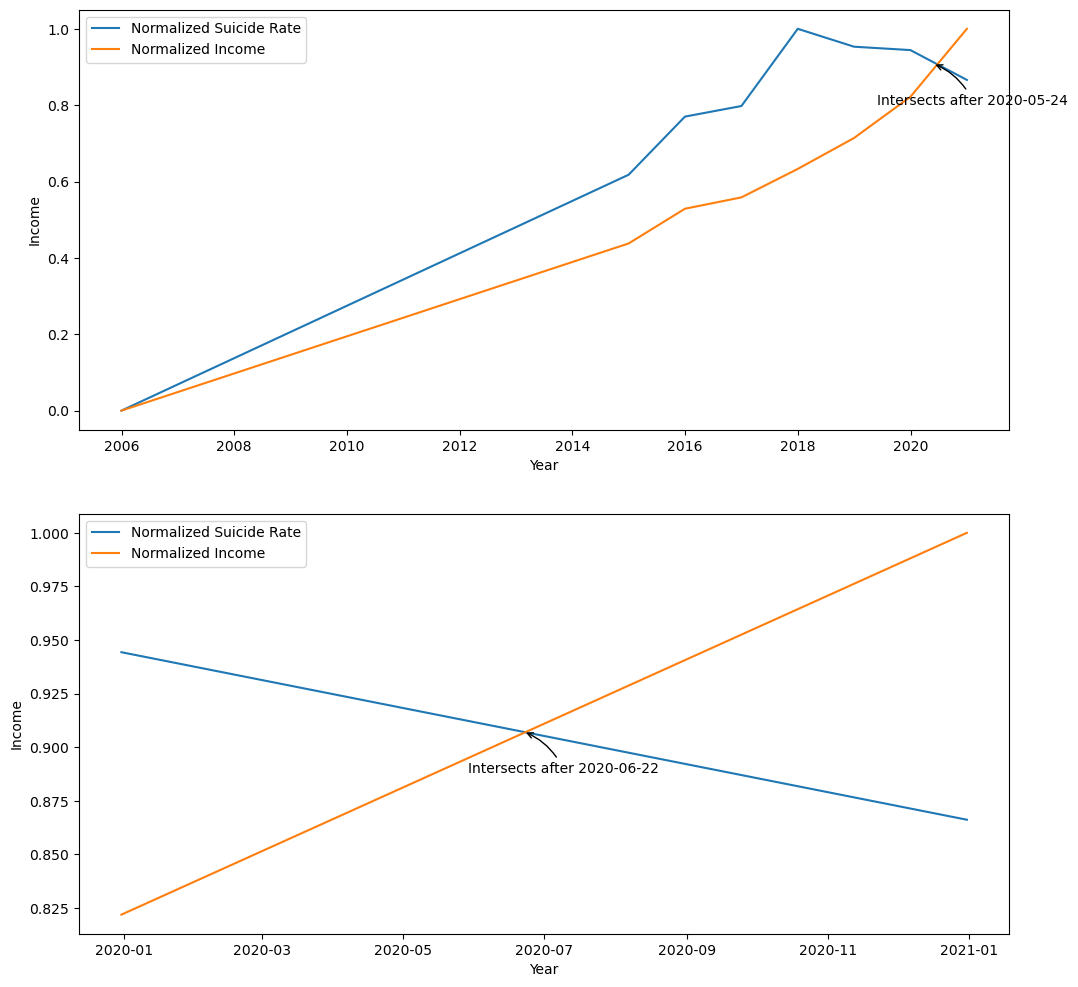

In [50]:
#dates of intersection based on visualization of orginal and zoomed data
date = grouped_data.index[intersection[1]] + 145 * Day()
date2 = grouped_data.index[intersection[1]] + 174* Day()

#applying the annotation
annotate_date(ax1, date, -0.035)
annotate_date(ax2, date2, -0.037)

fig

<b>Saving the Plot</b>

In [51]:
 plt.savefig('income-VS-sui.png', format='png')

<Figure size 640x480 with 0 Axes>

### correlation before & after 2019

In [52]:
# # # Find the intersection point
intersection = np.argwhere(np.diff(np.sign(grouped_data['suicide rate'] - grouped_data['income']))).flatten()

intersection_x = -40
intersection_y = -40

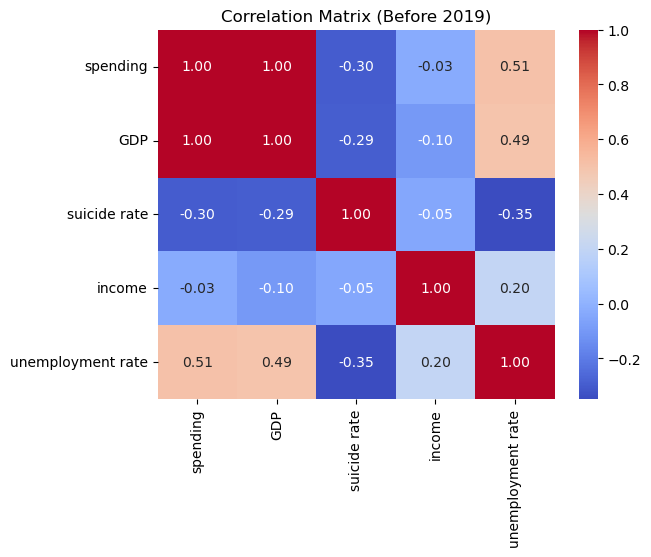

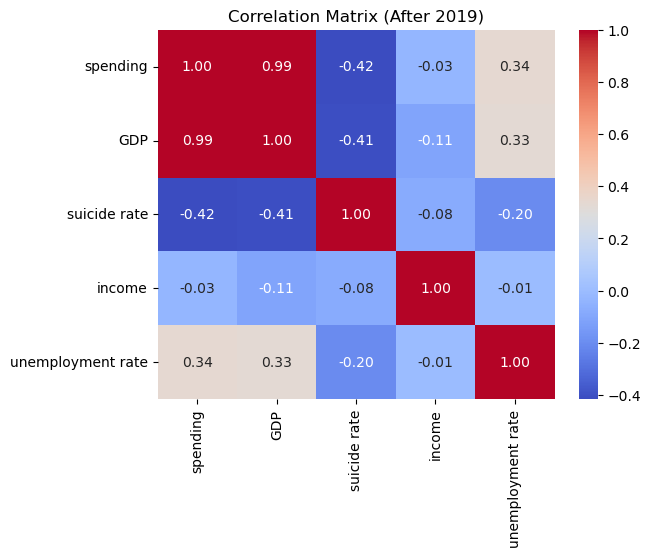

In [53]:

before_2019 = org_concatenated.loc[org_concatenated.index.get_level_values('Year') < '2019', :]
after_2019 = org_concatenated.loc[org_concatenated.index.get_level_values('Year') >= '2019', :]

corr_before = before_2019[['spending', 'GDP', 'suicide rate', 'income', 'unemployment rate']].corr()
corr_after = after_2019[['spending', 'GDP', 'suicide rate', 'income', 'unemployment rate']].corr()

sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Before 2019)')
# plt.savefig('corr-b-2019.png', format='png')
plt.show()

sns.heatmap(corr_after, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After 2019)')
# plt.savefig('corr-a-2019.png', format='png')
plt.show()